In [1]:
# Importar las librerías necesarias
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  


# Cargar y Explorar los Datos
Carga el archivo parquet usando pandas y realiza una exploración inicial de los datos, incluyendo estadísticas descriptivas y visualización de distribuciones.

In [2]:
# Cargar el archivo parquet
file_path = '../../data/processed/inmuebles24_departamentos.parquet'
df = pd.read_parquet(file_path)

In [3]:
# Exploración inicial de los datos
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,cuenta_con_terraza,cuenta_con_comedor,cuenta_con_area_de_lavado,cuenta_con_salon_usos_multiples,cuenta_con_mantenimiento_incluido,cuenta_con_vigilancia_24_horas,direccion,colonia,cp,municipio
0,24000.0,100,2.0,2.0,1.0,0,0,1,1,0,...,0,1,0,0,0,0,san jeronimo lidice san jeronimo lidice la mag...,san jeronimo lidice,10200,la magdalena contreras
1,12000.0,50,1.0,1.0,1.0,1,0,0,1,1,...,0,0,1,0,1,0,callejon del prado barrio san francisco la mag...,el prado,9480,la magdalena contreras
2,34100.0,232,3.0,4.0,2.0,0,0,1,1,1,...,1,1,0,0,0,1,blvd. adolfo ruiz cortines 2775 san jeronimo l...,adolfo ruiz cortines,4630,la magdalena contreras
3,16000.0,165,2.0,1.0,1.0,0,0,0,1,0,...,0,1,0,0,0,0,magnolia 26 san jeronimo lidice la magdalena c...,san jeronimo lidice,10200,la magdalena contreras
4,26000.0,180,3.0,2.0,2.0,0,0,1,0,1,...,0,0,0,0,0,1,san marcos 11 pedregal 2 la magdalena contreras,san marcos,2020,la magdalena contreras


In [4]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10233 entries, 0 to 10232
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   precio_mxn                         10233 non-null  float64
 1   lote_m2                            10162 non-null  Int64  
 2   recamaras                          10233 non-null  float64
 3   baños                              10233 non-null  float64
 4   estacionamiento                    10233 non-null  float64
 5   es_amueblado                       10233 non-null  int64  
 6   es_penthouse                       10233 non-null  int64  
 7   cuenta_con_cocina_integral         10233 non-null  int64  
 8   cuenta_con_sala                    10233 non-null  int64  
 9   cuenta_con_closet                  10233 non-null  int64  
 10  cuenta_con_balcon                  10233 non-null  int64  
 11  cuenta_con_gimnasi

In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Estadísticas descriptivas:


,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,cuenta_con_terraza,cuenta_con_comedor,cuenta_con_area_de_lavado,cuenta_con_salon_usos_multiples,cuenta_con_mantenimiento_incluido,cuenta_con_vigilancia_24_horas,direccion,colonia,cp,municipio
count,10233.000000,10162.0,10233.000000,10233.000000,10233.000000,10233.000000,10233.000000,10233.000000,10233.000000,10233.000000,...,10233.000000,10233.000000,10233.000000,10233.000000,10233.000000,10233.000000,10233,10233,10233,10233
unique,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5954,375,343,15
top,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,polanco polanco miguel hidalgo,hidalgo,1120,miguel hidalgo
freq,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,76,2964,2973,3313
mean,39238.296582,322.514662,1.971758,1.765367,1.378970,0.300205,0.041728,0.311737,0.544317,0.235317,...,0.236490,0.501222,0.052380,0.001857,0.192026,0.514903,NaN,NaN,NaN,NaN
std,32201.916677,13699.347561,0.843897,0.785151,0.945978,0.458369,0.199976,0.463225,0.498056,0.424218,...,0.424947,0.500023,0.222802,0.043052,0.393912,0.499802,NaN,NaN,NaN,NaN
min,12.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,20000.000000,63.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,29500.000000,90.0,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,45000.000000,148.0,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN


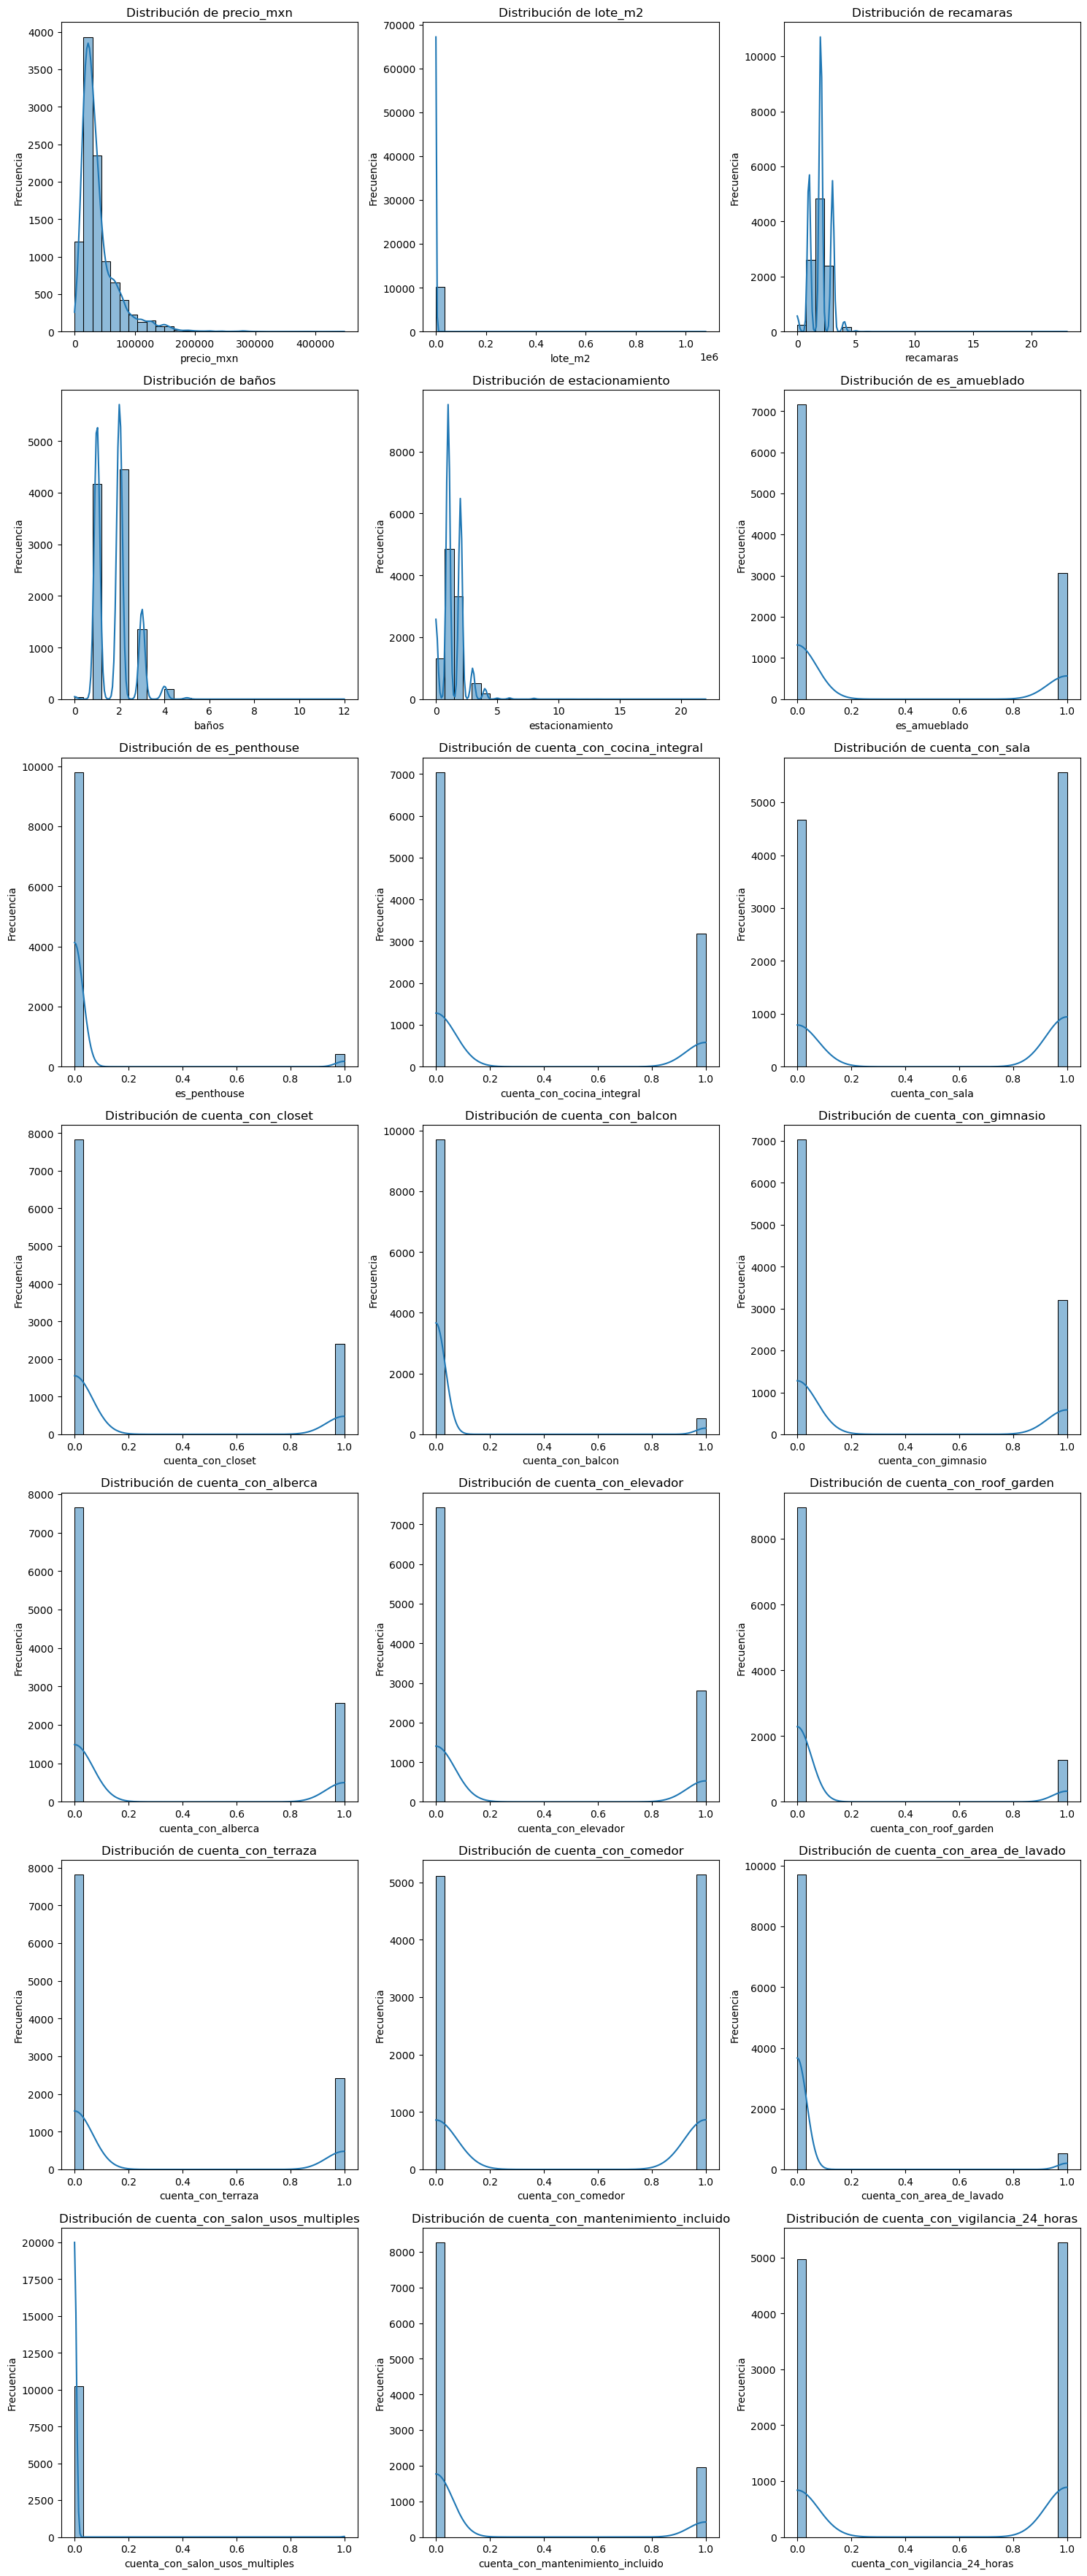

In [6]:
# Visualización de distribuciones
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Crear subplots para las columnas numéricas
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos subplots que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

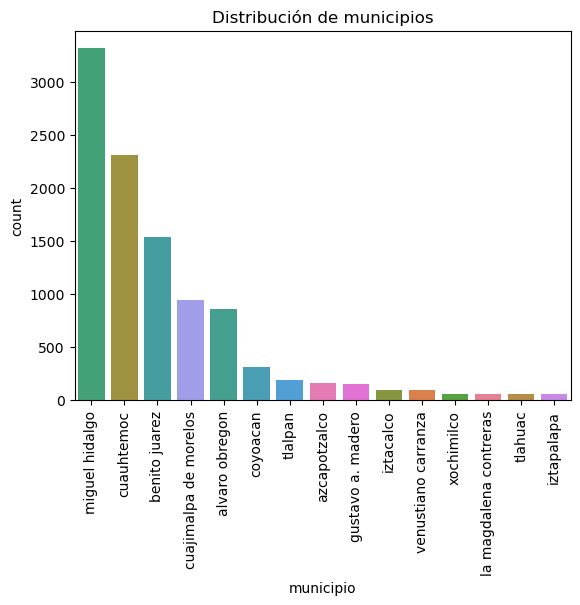

In [7]:
municipio_order = df['municipio'].value_counts().index

sns.countplot(data=df, x='municipio', order=municipio_order, hue='municipio')
plt.xticks(rotation=90)
plt.title('Distribución de municipios')
plt.show()

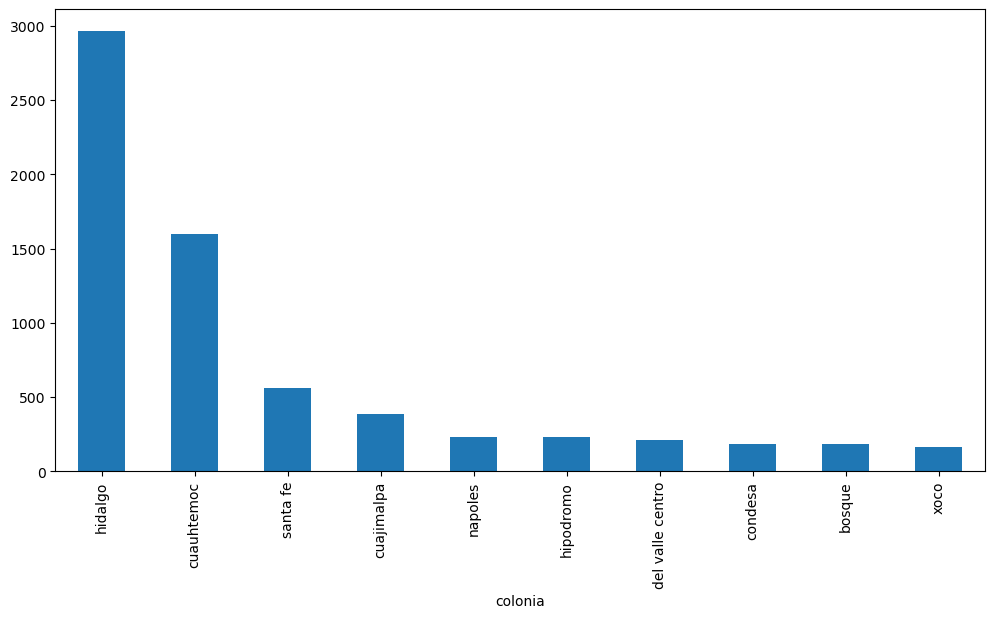

In [8]:
df.colonia.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

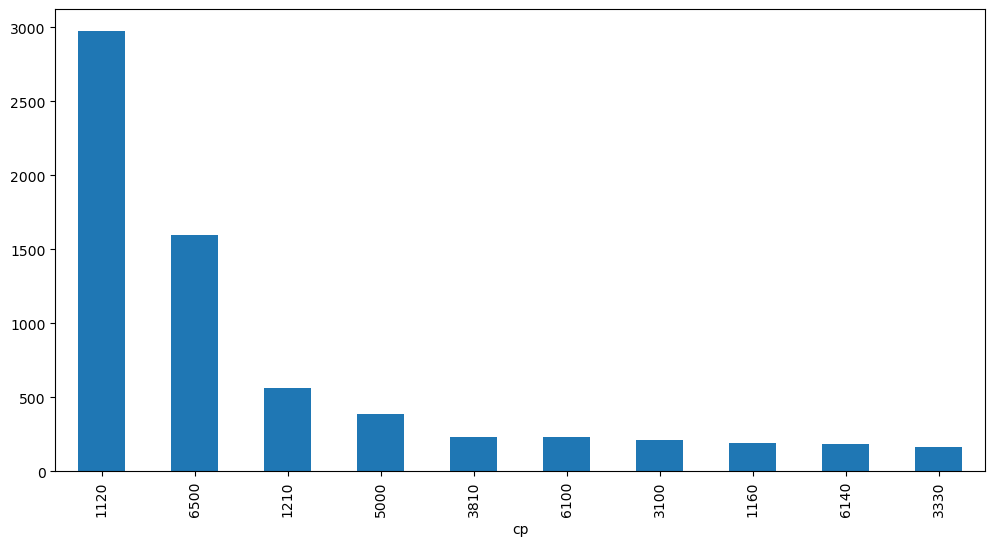

In [9]:
# Un CP puede contener varias colonias, así que nos quedamos sólo con colonias
df.cp.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

In [10]:
top10_cols= list(df.colonia.value_counts().head(10).index)

In [11]:
df['colonia_top10'] = df['colonia'].where(df['colonia'].isin(top10_cols), 'otros')

# Preprocesamiento de Datos
Aplica técnicas de limpieza de datos, manejo de valores nulos y codificación de variables categóricas.

In [12]:
# Identificar valores nulos en el DataFrame
print("\nValores nulos por columna:")
df.isnull().sum().sort_values(ascending=False)


Valores nulos por columna:


lote_m2                              71
precio_mxn                            0
municipio                             0
cp                                    0
colonia                               0
direccion                             0
cuenta_con_vigilancia_24_horas        0
cuenta_con_mantenimiento_incluido     0
cuenta_con_salon_usos_multiples       0
cuenta_con_area_de_lavado             0
cuenta_con_comedor                    0
cuenta_con_terraza                    0
cuenta_con_roof_garden                0
cuenta_con_elevador                   0
cuenta_con_alberca                    0
cuenta_con_gimnasio                   0
cuenta_con_balcon                     0
cuenta_con_closet                     0
cuenta_con_sala                       0
cuenta_con_cocina_integral            0
es_penthouse                          0
es_amueblado                          0
estacionamiento                       0
baños                                 0
recamaras                             0


In [13]:
# outliers
# Función para detectar outliers usando el método del rango intercuartílico (IQR) 
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

In [14]:
# Sólo seleccionar las columnas relevantes para el standarizado porque el resto son flags
cols = ['precio_mxn', 'lote_m2', 'recamaras', 'baños', 'estacionamiento']


Número de outliers en precio_mxn: 847
     precio_mxn
113    111960.0
225    121290.0
280    119424.0
295    153012.0
327     95000.0

Número de outliers en lote_m2: 747
     lote_m2
16       280
18       405
51      1200
134      575
189      500

Número de outliers en recamaras: 3
      recamaras
772         7.0
1539       10.0
3481       23.0

Número de outliers en baños: 220
     baños
2      4.0
16     4.0
17     4.0
377    4.0
417   12.0

Número de outliers en estacionamiento: 231
     estacionamiento
11               4.0
211             22.0
605              4.0
731              4.0
772              4.0


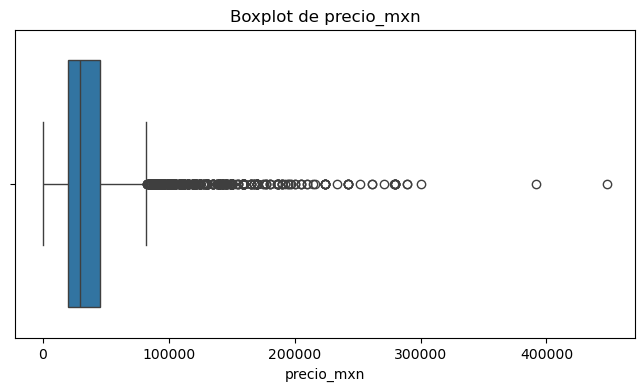

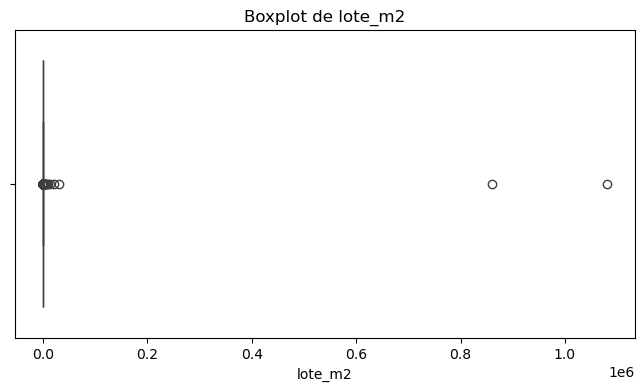

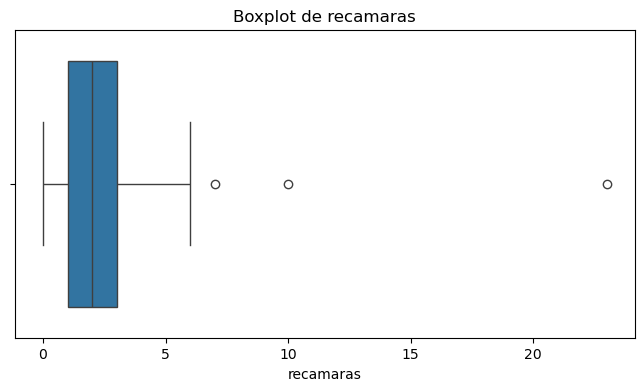

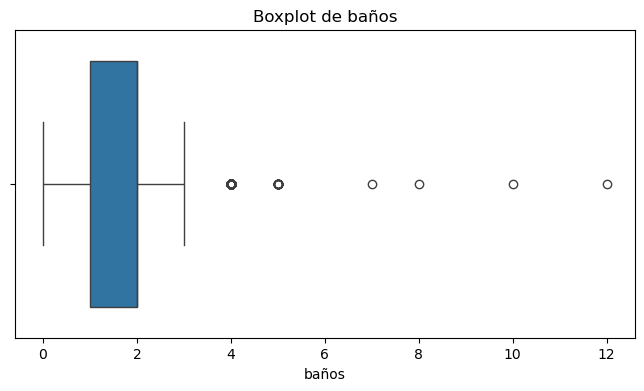

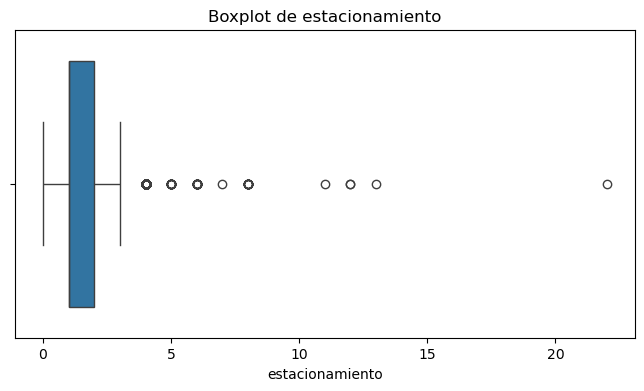

In [15]:
# Aplicar la función a las columnas numéricas
for col in cols:
    outliers = detectar_outliers_iqr(df, col)
    print(f"\nNúmero de outliers en {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]].head())
    # Visualizar outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")  

identificamos 2 outliers evidentes y muy seprados del resto de los datos en lote_m2, los cuales eliminamos

In [16]:
df.sort_values('lote_m2', ascending=False).head(5)

,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,cuenta_con_comedor,cuenta_con_area_de_lavado,cuenta_con_salon_usos_multiples,cuenta_con_mantenimiento_incluido,cuenta_con_vigilancia_24_horas,direccion,colonia,cp,municipio,colonia_top10
4980,22000.0,1080000,3.0,2.0,1.0,0,0,0,1,0,...,1,0,0,0,1,presidentes ejidales hospital naval militar co...,presidentes,1290,coyoacan,otros
6287,26000.0,860000,2.0,2.0,2.0,1,0,1,0,0,...,0,0,0,0,1,revillagigedo 18 centro cuauhtemoc,cuauhtemoc,6500,cuauhtemoc,cuauhtemoc
5071,50000.0,30468,3.0,3.0,3.0,0,0,0,1,1,...,1,0,0,0,0,lomas del pedregal lomas del pedregal tlalpan,tlalpan,14000,tlalpan,otros
7958,11000.0,20410,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,miguel angel santa maria nonoalco benito juarez,santa maria nonoalco,1420,benito juarez,otros
8254,20000.0,13000,2.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,av. victor hugo portales norte benito juarez,portales norte,3303,benito juarez,otros


In [17]:
# Identificar los índices de los dos outliers más grandes
outliers = df.sort_values('lote_m2', ascending=False).head(2).index

In [18]:
# Eliminar los outliers del DataFrame
df = df.drop(outliers)


In [19]:
categorical_columns = list(df.select_dtypes(include=["object", "category"]).columns)
categorical_columns.remove('direccion')

In [20]:
df = pd.get_dummies(df, columns=['municipio','colonia_top10'], drop_first=True)

In [21]:
df.head()

,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,colonia_top10_condesa,colonia_top10_cuajimalpa,colonia_top10_cuauhtemoc,colonia_top10_del valle centro,colonia_top10_hidalgo,colonia_top10_hipodromo,colonia_top10_napoles,colonia_top10_otros,colonia_top10_santa fe,colonia_top10_xoco
0,24000.0,100,2.0,2.0,1.0,0,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
1,12000.0,50,1.0,1.0,1.0,1,0,0,1,1,...,False,False,False,False,False,False,False,True,False,False
2,34100.0,232,3.0,4.0,2.0,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
3,16000.0,165,2.0,1.0,1.0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
4,26000.0,180,3.0,2.0,2.0,0,0,1,0,1,...,False,False,False,False,False,False,False,True,False,False


In [22]:
df.shape

(10231, 48)

# Clustering
Realiza un análisis de clustering para agrupar los datos en diferentes segmentos.

In [23]:
# Escalar los datos
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [24]:
## Arreglar los nulos y quitar esta celda
df = df.dropna()

In [25]:
df_analysis = df.drop(['direccion','colonia','precio_mxn','cp'], axis=1)

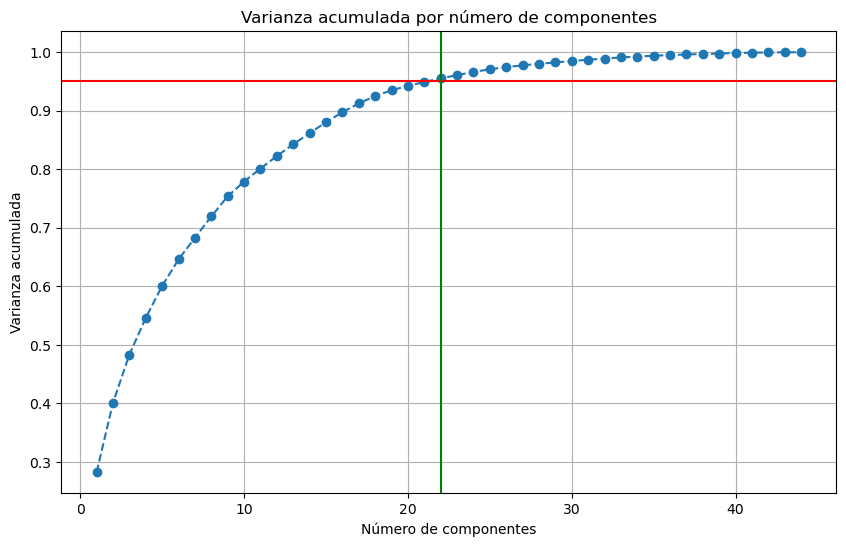

Número óptimo de componentes: 22


In [26]:
# Crear el modelo PCA sin especificar n_components
pca = PCA()
pca.fit(df_analysis)

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='-')
plt.grid()
plt.show()

# Elegir el número de componentes que expliquen al menos el 95% de la varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número óptimo de componentes: {n_components}")



In [27]:
print("Varianza acumulada:")
print(cumulative_variance)


Varianza acumulada:
[0.28254864 0.40137455 0.48342856 0.54633504 0.60088506 0.64612192
 0.68307485 0.71947941 0.75391882 0.77909573 0.80132559 0.82262177
 0.84278124 0.86181476 0.88037564 0.8974612  0.91252182 0.9251771
 0.93501682 0.94244724 0.94914109 0.95528063 0.96086134 0.96628443
 0.97083765 0.9746055  0.97756166 0.98019063 0.98266718 0.98499079
 0.9871455  0.98912448 0.99108738 0.99259897 0.99400561 0.9951909
 0.99614777 0.99704281 0.99779797 0.99852868 0.9992449  0.99963904
 0.99987013 1.        ]


In [28]:
# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df_analysis)

In [29]:
# Importancia de cada componente (varianza explicada)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")

Varianza explicada por cada componente:
Componente 1: 28.25%
Componente 2: 11.88%
Componente 3: 8.21%
Componente 4: 6.29%
Componente 5: 5.46%
Componente 6: 4.52%
Componente 7: 3.70%
Componente 8: 3.64%
Componente 9: 3.44%
Componente 10: 2.52%
Componente 11: 2.22%
Componente 12: 2.13%
Componente 13: 2.02%
Componente 14: 1.90%
Componente 15: 1.86%
Componente 16: 1.71%
Componente 17: 1.51%
Componente 18: 1.27%
Componente 19: 0.98%
Componente 20: 0.74%
Componente 21: 0.67%
Componente 22: 0.61%


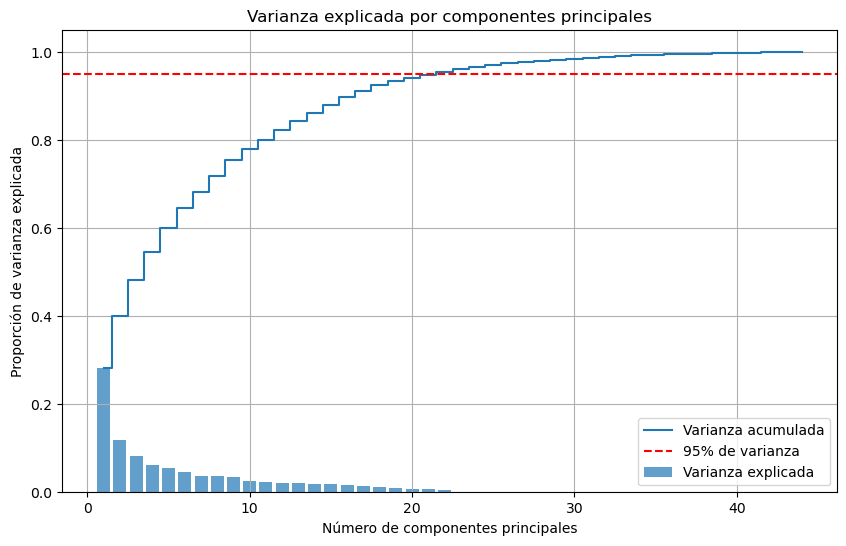

In [30]:
# Gráfica de varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [31]:
# Contribución de las características originales a los primeros 22 componentes
components = pd.DataFrame(pca.components_[:22], columns=df_analysis.columns)
print("\nContribución de las características originales a los primeros 22 componentes:")
components.T


Contribución de las características originales a los primeros 22 componentes:


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
lote_m2,0.193000,0.980255,-0.017531,0.002961,0.012267,0.006907,0.017759,-0.003871,0.023829,0.000664,...,-0.003366,0.004278,0.002002,-0.000606,-0.000522,0.002394,-0.005019,0.001450,0.002236,0.001118
recamaras,0.543195,-0.128437,-0.565644,0.144966,-0.046347,-0.039105,-0.043048,-0.252184,0.516716,0.029453,...,0.018933,0.025156,-0.021210,-0.016387,0.048217,0.042195,0.001590,-0.006317,0.005400,-0.000456
baños,0.589873,-0.108877,-0.076505,0.153305,-0.044800,0.325550,0.086230,0.487717,-0.486205,0.017494,...,0.011898,-0.036109,0.019300,0.035372,-0.074029,-0.027108,-0.010285,0.011721,-0.010399,-0.002730
estacionamiento,0.525350,-0.087879,0.591103,-0.370101,-0.160082,-0.166717,-0.129004,-0.372347,-0.030874,-0.023951,...,-0.013297,-0.020310,0.072199,0.052543,0.054080,-0.039368,-0.025348,-0.024124,-0.009003,0.006630
es_amueblado,-0.036938,0.002751,0.063778,0.100635,0.156362,0.172741,0.079353,-0.208222,-0.042400,0.647448,...,0.062325,0.118520,0.053856,-0.116470,0.005933,0.095008,-0.015640,0.022954,0.011454,-0.009733
es_penthouse,0.028896,-0.001448,0.001931,-0.001338,-0.004170,0.013474,0.004559,0.002816,-0.026968,-0.005593,...,-0.046550,-0.018126,0.000412,0.009304,0.052737,0.067916,0.050741,-0.039366,-0.001192,-0.113719
cuenta_con_cocina_integral,0.013348,-0.020987,-0.036907,-0.170057,0.195048,-0.056511,0.330638,0.072697,0.149004,-0.419583,...,-0.312308,-0.194698,-0.200133,-0.036678,0.014440,0.017362,0.019597,-0.035888,0.010152,-0.011030
cuenta_con_sala,0.056936,-0.011255,-0.096923,-0.297469,0.540238,-0.018830,-0.271628,0.130400,-0.015405,0.125797,...,-0.040972,-0.063226,0.058328,-0.068596,0.043143,-0.011834,-0.039332,-0.667275,-0.017201,-0.119049
cuenta_con_closet,0.023825,-0.004730,-0.031758,-0.133731,0.136811,-0.054981,0.145636,0.045133,-0.036349,-0.364561,...,0.642794,0.541641,-0.016238,0.078137,0.114670,-0.004621,-0.017735,-0.047912,-0.015404,-0.019448
cuenta_con_balcon,0.006474,-0.003101,0.000027,-0.005040,0.004460,0.019460,0.012016,-0.009943,-0.018593,0.011737,...,-0.012618,0.010187,0.029905,0.049911,0.035840,0.044881,0.044240,0.049953,0.708417,0.019171


In [32]:
most_important_features = components.iloc[0].abs().sort_values(ascending=False).head(20)
print("Características más importantes del primer componente:")
print(most_important_features)

Características más importantes del primer componente:
baños                                0.589873
recamaras                            0.543195
estacionamiento                      0.525350
lote_m2                              0.193000
municipio_cuauhtemoc                 0.088122
municipio_miguel hidalgo             0.076698
cuenta_con_vigilancia_24_horas       0.067199
colonia_top10_cuauhtemoc             0.066421
cuenta_con_comedor                   0.063932
colonia_top10_hidalgo                0.061515
cuenta_con_sala                      0.056936
cuenta_con_terraza                   0.046067
es_amueblado                         0.036938
cuenta_con_alberca                   0.034417
municipio_cuajimalpa de morelos      0.034149
cuenta_con_elevador                  0.031500
es_penthouse                         0.028896
cuenta_con_closet                    0.023825
colonia_top10_otros                  0.023664
cuenta_con_mantenimiento_incluido    0.019437
Name: 0, dtype: float64


In [33]:
# Reconstrucción aproximada de los datos originales
reconstructed_data = pca.inverse_transform(pca_data)

In [34]:

# Comparar los datos originales con los reconstruidos
print("Datos originales (primeras filas):")
df_analysis.head()

Datos originales (primeras filas):


,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,cuenta_con_balcon,...,colonia_top10_condesa,colonia_top10_cuajimalpa,colonia_top10_cuauhtemoc,colonia_top10_del valle centro,colonia_top10_hidalgo,colonia_top10_hipodromo,colonia_top10_napoles,colonia_top10_otros,colonia_top10_santa fe,colonia_top10_xoco
0,-0.074794,0.033589,0.298884,-0.400579,0,0,1,1,0,0,...,False,False,False,False,False,False,False,True,False,False
1,-0.193013,-1.151418,-0.974704,-0.400579,1,0,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
2,0.237307,1.218597,2.846062,0.656507,0,0,1,1,1,0,...,False,False,False,False,False,False,False,True,False,False
3,0.078892,0.033589,-0.974704,-0.400579,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,False
4,0.114358,1.218597,0.298884,0.656507,0,0,1,0,1,0,...,False,False,False,False,False,False,False,True,False,False


In [35]:
print("\nDatos reconstruidos (primeras filas):")
pd.DataFrame(reconstructed_data, columns=df_analysis.columns).head()


Datos reconstruidos (primeras filas):


,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,cuenta_con_balcon,...,colonia_top10_condesa,colonia_top10_cuajimalpa,colonia_top10_cuauhtemoc,colonia_top10_del valle centro,colonia_top10_hidalgo,colonia_top10_hipodromo,colonia_top10_napoles,colonia_top10_otros,colonia_top10_santa fe,colonia_top10_xoco
0,-0.075737,0.033101,0.298956,-0.399191,-0.004133,0.028034,0.997087,0.993870,0.006926,-0.028092,...,0.013437,0.009338,-0.023386,-0.029381,-0.019313,0.019598,-0.033433,1.026155,0.039251,-0.008558
1,-0.193934,-1.150590,-0.979258,-0.397823,0.992104,-0.018345,0.009004,1.033835,1.023525,0.389921,...,0.021516,-0.030428,-0.077078,-0.036549,-0.031130,0.051533,-0.036015,1.021168,0.140009,-0.013502
2,0.235754,1.218634,2.839014,0.655156,-0.006604,0.157149,0.999425,0.985840,1.009639,-0.033374,...,0.015731,-0.004964,-0.027714,-0.016790,-0.069078,0.045763,-0.052448,1.035115,0.065536,-0.015049
3,0.078072,0.033016,-0.972972,-0.398659,-0.004125,-0.001755,-0.003139,0.996772,0.006650,-0.021248,...,0.014367,0.009647,-0.023900,-0.027191,-0.012924,0.012649,-0.022643,1.024097,0.034269,-0.020261
4,0.113456,1.218111,0.299729,0.657418,-0.003717,0.024763,0.996177,-0.006736,1.004863,-0.049494,...,0.004076,0.015178,-0.024232,-0.007216,-0.025235,0.029402,-0.031734,1.017619,0.022364,-0.029001


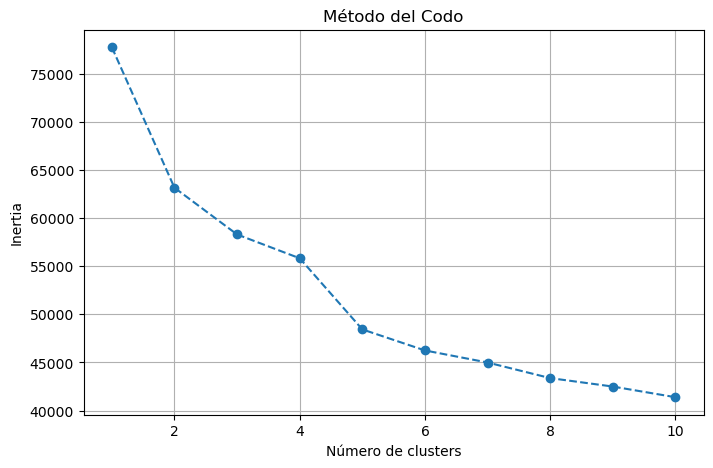

In [36]:
# Calcular la inertia para diferentes números de clusters
inertia = []
for k in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # Usa los datos reducidos por PCA
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid()
plt.show()

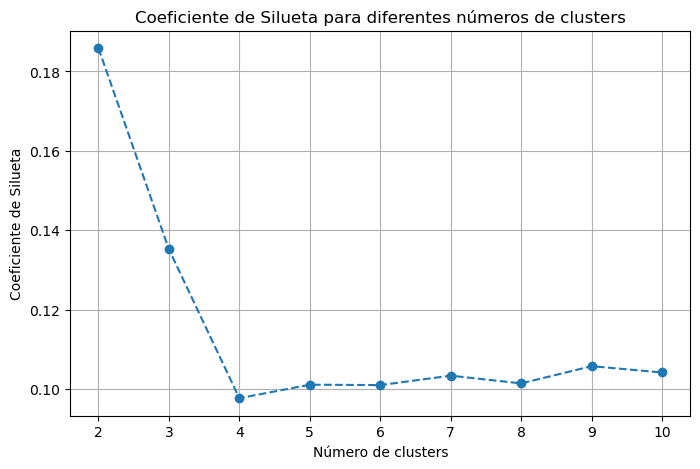

In [37]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de clusters')
plt.grid()
plt.show()

In [38]:
# Aplicar el algoritmo K-Means para clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_analysis)

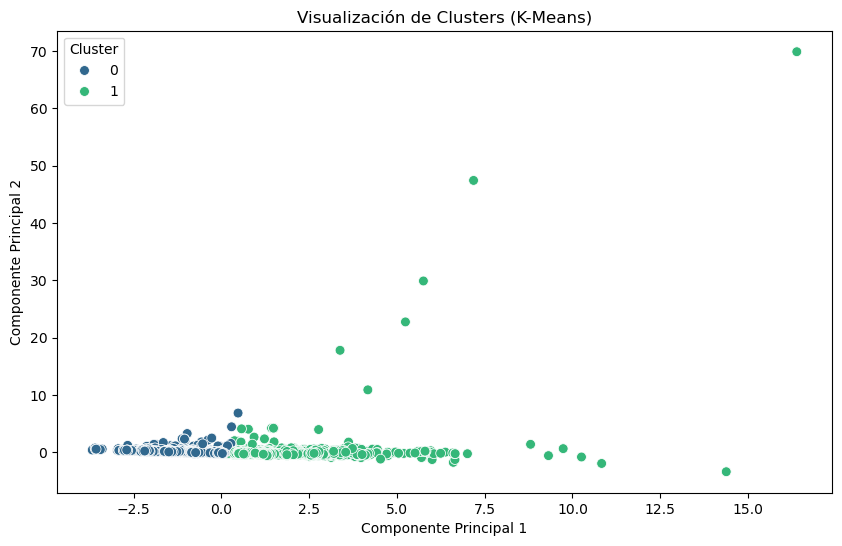

In [39]:

# Agregar los clusters al DataFrame original
df['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("Visualización de Clusters (K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

In [40]:
import plotly.express as px

# Crear un DataFrame con los datos de PCA y clusters
df_pca = pd.DataFrame(pca_data[:,:3], columns=['PC1', 'PC2', 'PC3'])  # Asegúrate de que pca_data tenga al menos 3 componentes
df_pca['Cluster'] = clusters  # Agregar los clusters al DataFrame

# Graficar en 3D con plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',  # Ejes del gráfico
    color='Cluster',            # Colorear por cluster
    title="Visualización de Clusters en 3D (K-Means)",
    opacity=0.3,                # Transparencia de los puntos
    size_max=1,                 # Tamaño máximo de los puntos
    symbol_sequence=['circle'], # Usar círculos como símbolo
    color_continuous_scale='Viridis'  # Paleta de colores
)

# Ajustar el tamaño del gráfico
fig.update_layout(
    width=600,  # Ancho del gráfico
    height=600   # Alto del gráfico
)

# Mostrar el gráfico interactivo
fig.show()

In [41]:
# Mostrar el tamaño de cada cluster
cluster_sizes = df['Cluster'].value_counts()
print("\nTamaño de cada cluster:")
cluster_sizes


Tamaño de cada cluster:


Cluster
0    5696
1    4464
Name: count, dtype: int64

In [42]:
# Calcular las características promedio de cada cluster
numeric_columns = df.select_dtypes('number')
cluster_means = numeric_columns.groupby(df['Cluster']).mean()
cluster_means.T

Cluster,0,1
precio_mxn,-0.435956,0.560726
lote_m2,-0.127660,0.162892
recamaras,-0.558498,0.716349
baños,-0.629029,0.811572
estacionamiento,-0.573172,0.737967
es_amueblado,0.332338,0.257616
es_penthouse,0.012465,0.079077
cuenta_con_cocina_integral,0.296524,0.333557
cuenta_con_sala,0.484551,0.619624
cuenta_con_closet,0.214537,0.263889
